In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Copper_Set.csv')
df.head(5)

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/839307708.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
# Checking datatype format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
df.columns = ['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status', 'item_type', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery_date', 'selling_price']

In [6]:
df['item_date'].fillna(method='bfill',inplace=True) 

df['item_date'] = df['item_date'].apply(lambda x : str(int(x))) # String Conversion

df['item_date'] = df['item_date'].apply(lambda x : f'{x[0:4]}-{x[4:6]}-{x[6:8]}')

df['item_date_day'] = df['item_date'].apply(lambda x : x[8:])

df['item_date'] = df['item_date'].apply(lambda x :  pd.to_datetime(f'{x[0:4]}-01-01',format='%Y-%m-%d')  if x[5:7] == '00' or x[8:] == '00' or int(x[5:7]) > 12 else pd.to_datetime(x,format='%Y-%m-%d'))

# Date format Conversion

df['item_date_year'] = pd.to_datetime(df['item_date']).dt.year

df['item_date_month'] = pd.to_datetime(df['item_date']).dt.month

print('Total Missing Value :',df['item_date'].isnull().sum())
    

Total Missing Value : 0


In [7]:
df['quantity_tons'] = df['quantity_tons'].apply(lambda x : float('1000.00') if x == 'e' else float(x))

print('Total Missing Value :',df['quantity_tons'].isnull().sum())

Total Missing Value : 0


In [8]:
df['customer'] = df['customer'].apply(lambda x : str(x))

df['customer'] = df['customer'].apply(lambda x : x.split('.'))

df['customer'] = df['customer'].apply(lambda x : x[0])

In [9]:
df.dtypes

id                         object
item_date          datetime64[ns]
quantity_tons             float64
customer                   object
country                   float64
status                     object
item_type                  object
application               float64
thickness                 float64
width                     float64
material_ref               object
product_ref                 int64
delivery_date             float64
selling_price             float64
item_date_day              object
item_date_year              int32
item_date_month             int32
dtype: object

In [20]:
# Collecting Won or Lost

# df.drop('id','material_ref', axis = 1)
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['material_ref'].fillna('unknown', inplace=True)
new_df = df.query('status == "Won" or status == "Lost"')
new_df = df.copy()
new_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,01,2021,4
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,01,2021,4
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,01,2021,4
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,01,2021,4
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,01,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,02,2020,7
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,02,2020,7
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,02,2020,7
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00,02,2020,7


In [21]:
new_df.isnull().sum()

id                  2
item_date           0
quantity_tons       0
customer            0
country            28
status              2
item_type           0
application        24
thickness           1
width               0
material_ref        0
product_ref         0
delivery_date       1
selling_price       1
item_date_day       0
item_date_year      0
item_date_month     0
dtype: int64

In [22]:
new_df = new_df.dropna(subset=['country'])
new_df = new_df.dropna(subset=['status'])
new_df = new_df.dropna(subset=['thickness'])
new_df = new_df.dropna(subset=['selling_price'])
new_df = new_df.dropna(subset=['delivery_date'])
new_df.isnull().sum()

id                 2
item_date          0
quantity_tons      0
customer           0
country            0
status             0
item_type          0
application        0
thickness          0
width              0
material_ref       0
product_ref        0
delivery_date      0
selling_price      0
item_date_day      0
item_date_year     0
item_date_month    0
dtype: int64

In [23]:
# Conversion Process

new_df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [24]:
new_df['status'] = new_df['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':5,
       'Wonderful':6, 'Revised':7, 'Offered':8, 'Offerable':4})
new_df['status'].unique()

array([1, 2, 3, 0, 5, 6, 7, 8, 4])

In [25]:
# Convert Categorical data into continous data

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [26]:
# Item Type Conversion

new_df['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [27]:
new_df['item_type'] = encoder.fit_transform(new_df[['item_type']])
new_df['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [28]:
# Format Conversion

new_df['application'].fillna(method='bfill',inplace=True)
new_df['application'] = new_df['application'].apply(lambda x : float(x))
new_df['thickness'] = new_df['thickness'].apply(lambda x : float(x))
new_df['width'] = new_df['width'].apply(lambda x : float(x))
new_df['product_ref'] = new_df['product_ref'] .apply(lambda x : str(x))
new_df.isnull().sum()

id                 2
item_date          0
quantity_tons      0
customer           0
country            0
status             0
item_type          0
application        0
thickness          0
width              0
material_ref       0
product_ref        0
delivery_date      0
selling_price      0
item_date_day      0
item_date_year     0
item_date_month    0
dtype: int64

In [29]:
new_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28.0,1,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,01,2021,4
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25.0,1,5.0,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,01,2021,4
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30.0,1,6.0,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,01,2021,4
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32.0,1,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,01,2021,4
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28.0,1,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,01,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25.0,1,5.0,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,02,2020,7
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854,25.0,1,5.0,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,02,2020,7
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25.0,1,5.0,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,02,2020,7
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854,25.0,1,5.0,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00,02,2020,7


In [30]:
new_df['delivery_date'].fillna(method='bfill',inplace=True) # Missing value Filled

new_df['delivery_date'] = new_df['delivery_date'].apply(lambda x : str(x)) # String Conversion

new_df['delivery_date'] = new_df['delivery_date'].apply(lambda x : f'{x[0:4]}-{x[4:6]}-{x[6:8]}')

new_df['delivery_date'] = new_df['delivery_date'].apply(lambda x : '2023-01-01'   if  int(x[:4]) > 2023  else x)

new_df['delivery_date_day'] = new_df['delivery_date'].apply(lambda x : int(x[8:]))

new_df['delivery_date'] = new_df['delivery_date'].apply(lambda x : f'{x[:4]}-12-{x[8:]}'   if  int(x[5:7]) > 12  else x)

new_df['delivery_date'] = pd.to_datetime(new_df['delivery_date']) # Date format Conversion

new_df['delivery_date_month'] = pd.to_datetime(new_df['delivery_date']).dt.month

new_df['delivery_date_year'] = pd.to_datetime(new_df['delivery_date']).dt.year
new_df.dtypes

id                             object
item_date              datetime64[ns]
quantity_tons                 float64
customer                       object
country                       float64
status                          int64
item_type                     float64
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                    object
delivery_date          datetime64[ns]
selling_price                 float64
item_date_day                  object
item_date_year                  int32
item_date_month                 int32
delivery_date_day               int64
delivery_date_month             int32
delivery_date_year              int32
dtype: object

In [31]:
# Converting selling_price
 
Mean = round(new_df['selling_price'].mean(),3)

new_df['selling_price'].fillna(Mean,inplace=True)

new_df['selling_price'] = new_df['selling_price'].apply(lambda x : float(x))

In [32]:
new_df.isnull().sum()

id                     2
item_date              0
quantity_tons          0
customer               0
country                0
status                 0
item_type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery_date          0
selling_price          0
item_date_day          0
item_date_year         0
item_date_month        0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

In [33]:
new_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28.0,1,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,01,2021,4,1,7,2021
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25.0,1,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,01,2021,4,1,4,2021
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30.0,1,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,01,2021,4,1,1,2021
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32.0,1,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,01,2021,4,1,1,2021
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28.0,1,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,01,2021,4,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25.0,1,5.0,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,02,2020,7,1,7,2020
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854,25.0,1,5.0,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,02,2020,7,1,7,2020
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25.0,1,5.0,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,02,2020,7,1,7,2020
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854,25.0,1,5.0,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,02,2020,7,1,7,2020


In [34]:
new_df['item_date_day'] = new_df['item_date_day'].apply(lambda x : int(x))
new_df['quantity_tons'] = new_df['quantity_tons'].apply(lambda x : 0.0  if x<0.0 else x)
new_df['selling_price'] = new_df['selling_price'].apply(lambda x : 0.0  if x<0.0 else x)
new_df  

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28.0,1,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,1,2021,4,1,7,2021
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25.0,1,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,1,2021,4,1,4,2021
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30.0,1,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,1,2021,4,1,1,2021
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32.0,1,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,1,2021,4,1,1,2021
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28.0,1,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,1,2021,4,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25.0,1,5.0,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,2,2020,7,1,7,2020
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854,25.0,1,5.0,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,2,2020,7,1,7,2020
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25.0,1,5.0,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,2,2020,7,1,7,2020
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,0.000000,30200854,25.0,1,5.0,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,2,2020,7,1,7,2020


In [36]:
new_df_1 = new_df.copy()
columns = [ 'quantity_tons',  'application', 'thickness', 'width', 'selling_price', ]
columns

['quantity_tons', 'application', 'thickness', 'width', 'selling_price']

In [37]:
import numpy as np
def log_transformation(column):
    for i in column:
        new_df_1[i] = np.log(new_df_1[i])

log_transformation(columns)

/Users/arul/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


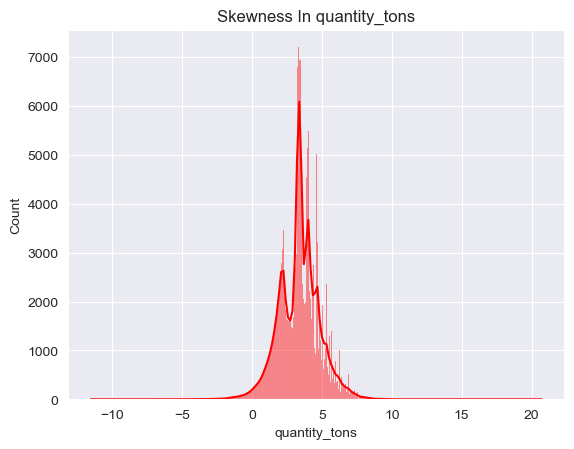

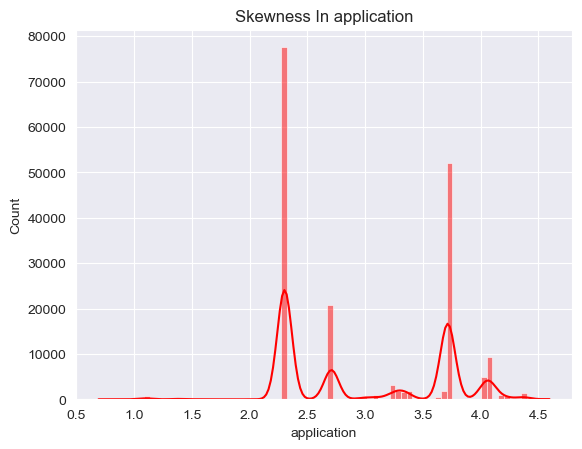

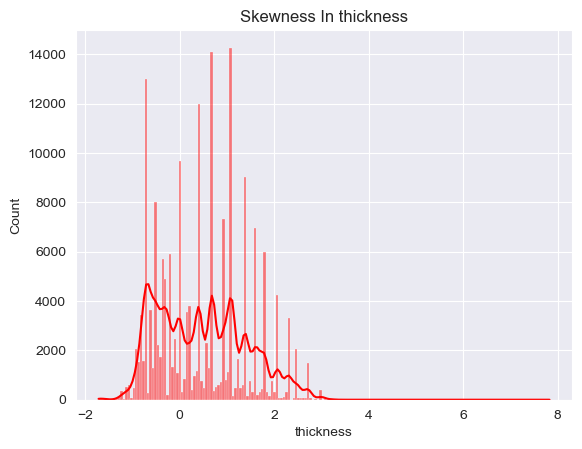

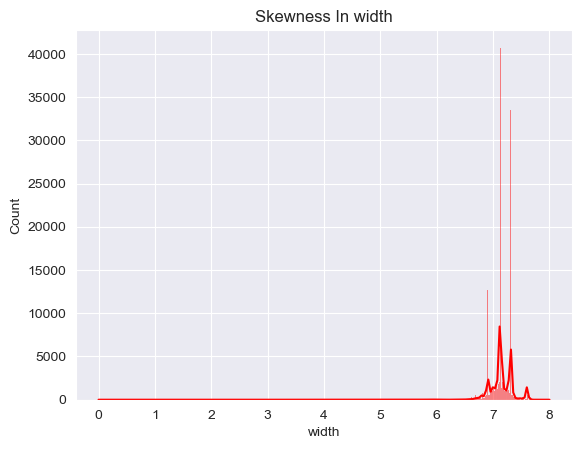

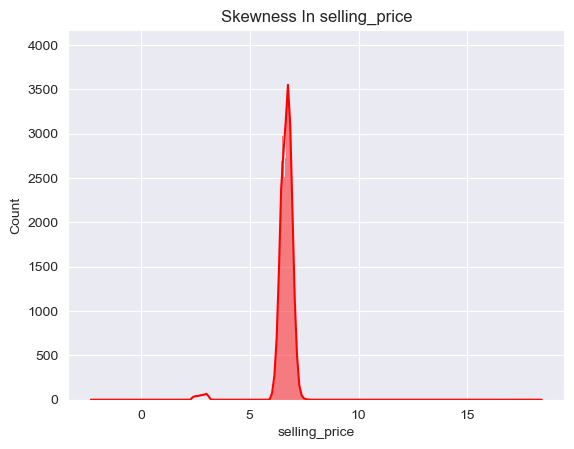

In [38]:
def before_skewness(column):
    for i in columns:
        sns.set_style("darkgrid")
        sns.histplot(new_df_1[i],kde=True,color='r')
        plt.title(f'Skewness In {i}')
        plt.show()

before_skewness(columns)

In [39]:
#Handling wrong delivery date data
new_df_1     

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,DEQ1 S460MC,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938,25.0,1,5.0,3.713572,-0.223144,7.098376,104991,1668701718,2021-04-01,6.953684,1,2021,4,1,4,2021
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963,30.0,1,6.0,3.332205,-0.967584,6.858565,S0380700,628377,2021-01-01,6.468211,1,2021,4,1,1,2021
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574,32.0,1,3.0,4.077537,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790,1,2021,4,1,1,2021
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560,28.0,1,5.0,2.302585,1.386294,7.600902,2_S275JR+AR-CL1,640665,2021-03-01,6.357842,1,2021,4,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,1000777,164141591,2020-07-01,6.381816,2,2020,7,1,7,2020
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,1000227,164141591,2020-07-01,6.378426,2,2020,7,1,7,2020
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,1004216,164141591,2020-07-01,6.428105,2,2020,7,1,7,2020
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-inf,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,1001149,164141591,2020-07-01,6.398595,2,2020,7,1,7,2020


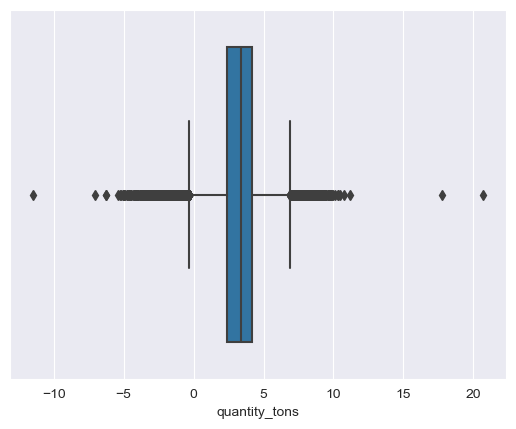

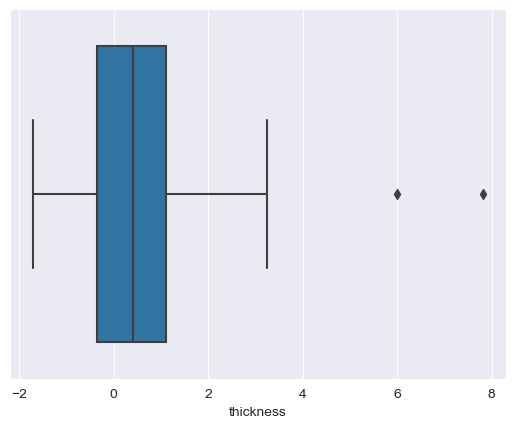

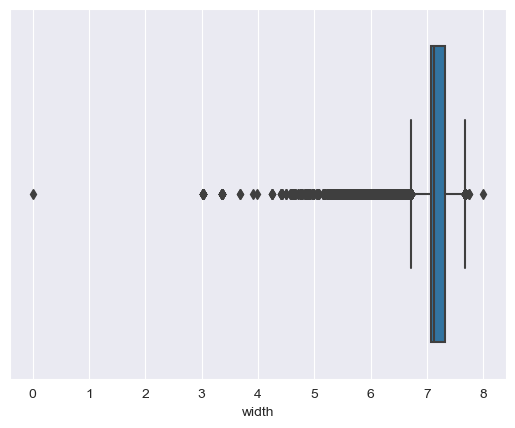

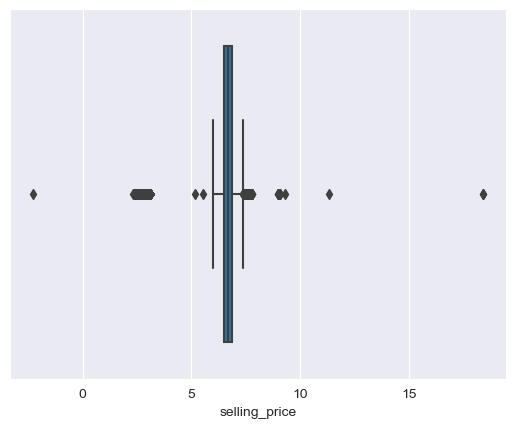

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(columns):
    for i in columns:
        sns.boxplot(data=new_df_1,x=i)
        plt.show()

box_plot(['quantity_tons','thickness','width','selling_price'])

In [41]:
import numpy as np

def treat_outliers(column):
    for i in column:
        iqr = np.percentile(new_df_1[i],75) - np.percentile(new_df_1[i],25)  # Q3 - Q1
        lower_bound =  np.percentile(new_df_1[i],25) - (1.5 * iqr)
        upper_bound = np.percentile(new_df_1[i],75) + (1.5 * iqr)
        new_df_1[i] = new_df_1[i].clip(lower_bound,upper_bound)
    print('succeesful')

treat_outliers(['quantity_tons','thickness','width','selling_price'])

succeesful


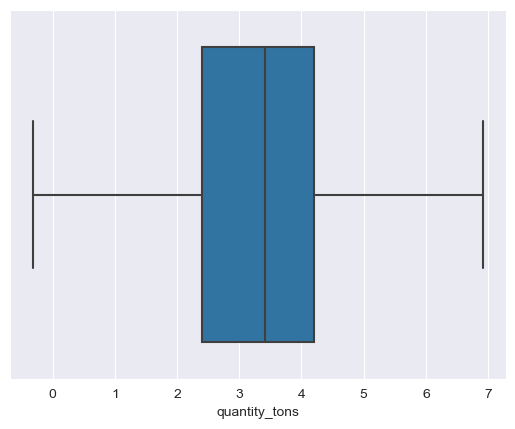

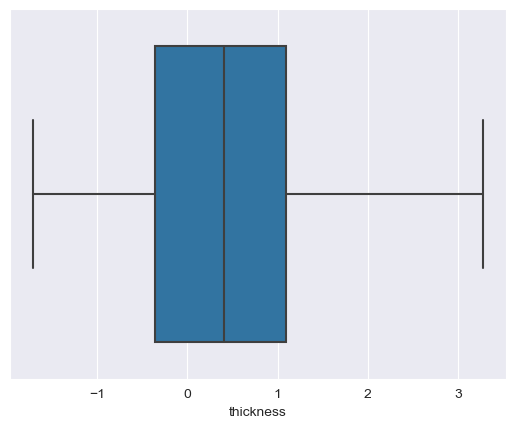

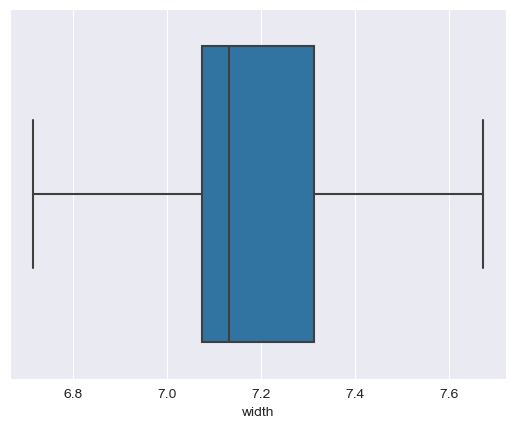

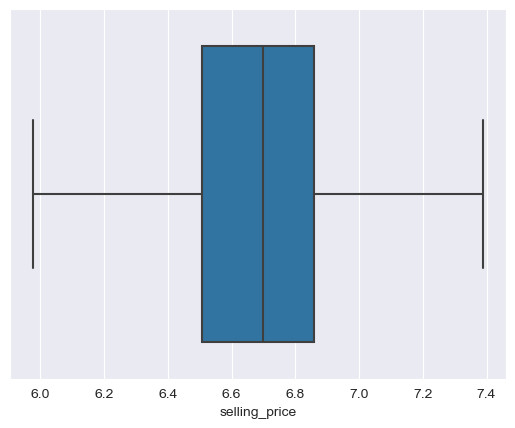

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(columns):
    for i in columns:
        sns.boxplot(data=new_df_1,x=i)
        plt.show()

box_plot(['quantity_tons','thickness','width','selling_price'])

In [43]:
new_df_1['delivery_item_date_difference_num'] = (new_df_1['delivery_date']-new_df_1['item_date']).dt.days
positive = new_df_1[new_df_1['delivery_item_date_difference_num']>0]
len(positive)

165073

In [44]:
new_df_1.head(3)

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938,25.0,1,5.0,3.713572,-0.223144,7.098376,...,1668701718,2021-04-01,6.953684,1,2021,4,1,4,2021,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963,30.0,1,6.0,3.332205,-0.967584,6.858565,...,628377,2021-01-01,6.468211,1,2021,4,1,1,2021,-90


In [45]:
# using model to predict date

correct_delivery_dates_df = new_df_1.query('delivery_item_date_difference_num>0')
correct_delivery_dates_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,1668701376,2021-07-01,7.217443,1,2021,4,1,7,2021,91
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,164141591,2021-07-01,7.001246,1,2021,4,1,7,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,88192D95-1EAF-4986-9354-EE54DB459159,2020-07-02,3.472467,30227718,25.0,0,3.0,2.708050,1.791759,7.600902,...,640665,2020-08-01,6.313548,2,2020,7,1,8,2020,30
181525,487588EF-6443-4F72-B724-AAB4582E182B,2020-07-02,4.196171,30161559,30.0,0,3.0,2.302585,1.348073,7.329750,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,4.156686,30161559,30.0,0,3.0,2.302585,1.766442,7.329750,...,640665,2020-08-01,6.124683,2,2020,7,1,8,2020,30
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,4.025862,30161559,30.0,0,3.0,2.302585,2.060514,7.313220,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30


In [46]:
wrong_delivery_dates_df = new_df_1.query('delivery_item_date_difference_num<=0')
wrong_delivery_dates_df  

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938,25.0,1,5.0,3.713572,-0.223144,7.098376,...,1668701718,2021-04-01,6.953684,1,2021,4,1,4,2021,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963,30.0,1,6.0,3.332205,-0.967584,6.858565,...,628377,2021-01-01,6.468211,1,2021,4,1,1,2021,-90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574,32.0,1,3.0,4.077537,0.832909,7.183112,...,1668701718,2021-01-01,6.643790,1,2021,4,1,1,2021,-90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560,28.0,1,5.0,2.302585,1.386294,7.600902,...,640665,2021-03-01,6.357842,1,2021,4,1,3,2021,-31
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,5.419608,30202938,25.0,1,5.0,3.713572,0.405465,7.142827,...,1668701718,2021-04-01,6.890609,1,2021,4,1,4,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,...,164141591,2020-07-01,6.381816,2,2020,7,1,7,2020,-1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,...,164141591,2020-07-01,6.378426,2,2020,7,1,7,2020,-1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,...,164141591,2020-07-01,6.428105,2,2020,7,1,7,2020,-1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,...,164141591,2020-07-01,6.398595,2,2020,7,1,7,2020,-1


In [47]:
correct_delivery_dates_df =  correct_delivery_dates_df.dropna()
correct_delivery_dates_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,1668701376,2021-07-01,7.217443,1,2021,4,1,7,2021,91
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,164141591,2021-07-01,7.001246,1,2021,4,1,7,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,88192D95-1EAF-4986-9354-EE54DB459159,2020-07-02,3.472467,30227718,25.0,0,3.0,2.708050,1.791759,7.600902,...,640665,2020-08-01,6.313548,2,2020,7,1,8,2020,30
181525,487588EF-6443-4F72-B724-AAB4582E182B,2020-07-02,4.196171,30161559,30.0,0,3.0,2.302585,1.348073,7.329750,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,4.156686,30161559,30.0,0,3.0,2.302585,1.766442,7.329750,...,640665,2020-08-01,6.124683,2,2020,7,1,8,2020,30
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,4.025862,30161559,30.0,0,3.0,2.302585,2.060514,7.313220,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30


In [48]:
x = correct_delivery_dates_df[[ 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_date_day', 'item_date_year',
       'item_date_month', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year',]]

y = correct_delivery_dates_df['delivery_item_date_difference_num']

In [49]:
# predict
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


xtrain = imputer.fit_transform(xtrain)

In [51]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor().fit(xtrain,ytrain)

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtest = imputer.fit_transform(xtest)    

In [53]:
from sklearn.metrics import r2_score
xtest = pd.DataFrame(xtest,columns=[ 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_date_day', 'item_date_year',
       'item_date_month', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year',])

ypred = model.predict(xtest)
score = r2_score(ytest,ypred)
score

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.9999156601513474

In [54]:
dates_predict = wrong_delivery_dates_df[[ 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_date_day', 'item_date_year',
       'item_date_month', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year',]]
     

In [55]:
dates_predict

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year
1,6.643822,30202938,25.0,1,5.0,3.713572,-0.223144,7.098376,1668701718,6.953684,1,2021,4,1,4,2021
2,5.956169,30153963,30.0,1,6.0,3.332205,-0.967584,6.858565,628377,6.468211,1,2021,4,1,1,2021
3,5.310301,30349574,32.0,1,3.0,4.077537,0.832909,7.183112,1668701718,6.643790,1,2021,4,1,1,2021
4,6.666354,30211560,28.0,1,5.0,2.302585,1.386294,7.600902,640665,6.357842,1,2021,4,1,3,2021
5,5.419608,30202938,25.0,1,5.0,3.713572,0.405465,7.142827,1668701718,6.890609,1,2021,4,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,164141591,6.381816,2,2020,7,1,7,2020
181669,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,164141591,6.378426,2,2020,7,1,7,2020
181670,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,164141591,6.428105,2,2020,7,1,7,2020
181671,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,164141591,6.398595,2,2020,7,1,7,2020


In [56]:
yhat_dates = model.predict(dates_predict)
yhat_dates  # We found correct dates for the wrong_delivery_dates_df

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([ 31.  , 350.37, 362.54, ...,  30.  ,  30.  ,  30.  ])

In [57]:
wrong_delivery_dates_df.drop('delivery_item_date_difference_num',axis=1,inplace=True)
wrong_delivery_dates_df['delivery_item_date_difference_num'] = yhat_dates
# wrong_delivery_dates_df.drop('delivery_item_date_difference',axis=1,inplace=True)

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/918689677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_delivery_dates_df.drop('delivery_item_date_difference_num',axis=1,inplace=True)
/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/918689677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_delivery_dates_df['delivery_item_date_difference_num'] = yhat_dates


In [58]:
wrong_delivery_dates_df['delivery_item_date_difference_num'] = wrong_delivery_dates_df['delivery_item_date_difference_num'].apply(lambda x : int(x))


/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/2822149357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_delivery_dates_df['delivery_item_date_difference_num'] = wrong_delivery_dates_df['delivery_item_date_difference_num'].apply(lambda x : int(x))


In [59]:
wrong_delivery_dates_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938,25.0,1,5.0,3.713572,-0.223144,7.098376,...,1668701718,2021-04-01,6.953684,1,2021,4,1,4,2021,31
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963,30.0,1,6.0,3.332205,-0.967584,6.858565,...,628377,2021-01-01,6.468211,1,2021,4,1,1,2021,350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574,32.0,1,3.0,4.077537,0.832909,7.183112,...,1668701718,2021-01-01,6.643790,1,2021,4,1,1,2021,362
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560,28.0,1,5.0,2.302585,1.386294,7.600902,...,640665,2021-03-01,6.357842,1,2021,4,1,3,2021,31
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,5.419608,30202938,25.0,1,5.0,3.713572,0.405465,7.142827,...,1668701718,2021-04-01,6.890609,1,2021,4,1,4,2021,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,...,164141591,2020-07-01,6.381816,2,2020,7,1,7,2020,30
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,...,164141591,2020-07-01,6.378426,2,2020,7,1,7,2020,30
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,...,164141591,2020-07-01,6.428105,2,2020,7,1,7,2020,30
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,...,164141591,2020-07-01,6.398595,2,2020,7,1,7,2020,30


In [60]:
# correct_delivery_dates_df.drop('delivery_item_date_difference',axis=1,inplace=True)

correct_delivery_dates_df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,1668701376,2021-07-01,7.217443,1,2021,4,1,7,2021,91
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,164141591,2021-07-01,7.001246,1,2021,4,1,7,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,88192D95-1EAF-4986-9354-EE54DB459159,2020-07-02,3.472467,30227718,25.0,0,3.0,2.708050,1.791759,7.600902,...,640665,2020-08-01,6.313548,2,2020,7,1,8,2020,30
181525,487588EF-6443-4F72-B724-AAB4582E182B,2020-07-02,4.196171,30161559,30.0,0,3.0,2.302585,1.348073,7.329750,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,4.156686,30161559,30.0,0,3.0,2.302585,1.766442,7.329750,...,640665,2020-08-01,6.124683,2,2020,7,1,8,2020,30
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,4.025862,30161559,30.0,0,3.0,2.302585,2.060514,7.313220,...,640665,2020-08-01,6.126869,2,2020,7,1,8,2020,30


In [61]:
cleaned_data = pd.concat([correct_delivery_dates_df,wrong_delivery_dates_df],axis=0,ignore_index=True)
cleaned_data

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
1,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
2,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,1668701376,2021-07-01,7.217443,1,2021,4,1,7,2021,91
3,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
4,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,164141591,2021-07-01,7.001246,1,2021,4,1,7,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,...,164141591,2020-07-01,6.381816,2,2020,7,1,7,2020,30
181634,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,...,164141591,2020-07-01,6.378426,2,2020,7,1,7,2020,30
181635,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,...,164141591,2020-07-01,6.428105,2,2020,7,1,7,2020,30
181636,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,...,164141591,2020-07-01,6.398595,2,2020,7,1,7,2020,30


In [62]:
cleaned_data.columns
cleaned_data.dtypes

id                                           object
item_date                            datetime64[ns]
quantity_tons                               float64
customer                                     object
country                                     float64
status                                        int64
item_type                                   float64
application                                 float64
thickness                                   float64
width                                       float64
material_ref                                 object
product_ref                                  object
delivery_date                        datetime64[ns]
selling_price                               float64
item_date_day                                 int64
item_date_year                                int32
item_date_month                               int32
delivery_date_day                             int64
delivery_date_month                           int32
delivery_dat

In [63]:
cleaned_data

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,product_ref,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,1670798778,2021-07-01,6.749931,1,2021,4,1,7,2021,91
1,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
2,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,1668701376,2021-07-01,7.217443,1,2021,4,1,7,2021,91
3,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,611993,2021-07-01,5.975038,1,2021,4,1,7,2021,91
4,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,164141591,2021-07-01,7.001246,1,2021,4,1,7,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,...,164141591,2020-07-01,6.381816,2,2020,7,1,7,2020,30
181634,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,...,164141591,2020-07-01,6.378426,2,2020,7,1,7,2020,30
181635,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,...,164141591,2020-07-01,6.428105,2,2020,7,1,7,2020,30
181636,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,...,164141591,2020-07-01,6.398595,2,2020,7,1,7,2020,30


In [64]:
cleaned_data.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price', 'item_date_day',
       'item_date_year', 'item_date_month', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year',
       'delivery_item_date_difference_num'],
      dtype='object')

In [65]:
def delivery_date(date,days_x):
    delivery_date = []
    for i,j in zip(date,days_x):
        result_date = i + pd.DateOffset(days=j)
        result_date_str = result_date.strftime('%Y-%m-%d')
        delivery_date.append(result_date_str)
    return delivery_date

In [66]:
x = delivery_date(cleaned_data['item_date'],cleaned_data['delivery_item_date_difference_num'])
x

['2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-06-01',
 '2021-07-01',
 '2021-06-01',
 '2021-07-01',
 '2021-07-01',
 '2021-06-01',
 '2021-05-01',
 '2021-07-01',
 '2021-06-01',
 '2021-05-01',
 '2021-07-01',
 '2021-08-01',
 '2021-05-01',
 '2023-01-01',
 '2021-08-01',
 '2021-05-01',
 '2021-07-01',
 '2021-07-01',
 '2021-05-01',
 '2021-07-01',
 '2021-07-01',
 '2021-05-01',
 '2021-07-01',
 '2021-07-01',
 '2021-05-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-08-01',
 '2021-07-01',
 '2021-06-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-01',
 '2021-09-01',
 '2021-07-01',
 '2021-07-01',
 '2021-07-

In [67]:
cleaned_data['delivery_date_pred'] = x

In [68]:
cleaned_data

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,...,delivery_date,selling_price,item_date_day,item_date_year,item_date_month,delivery_date_day,delivery_date_month,delivery_date_year,delivery_item_date_difference_num,delivery_date_pred
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,...,2021-07-01,6.749931,1,2021,4,1,7,2021,91,2021-07-01
1,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,2021-07-01,5.975038,1,2021,4,1,7,2021,91,2021-07-01
2,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,...,2021-07-01,7.217443,1,2021,4,1,7,2021,91,2021-07-01
3,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,...,2021-07-01,5.975038,1,2021,4,1,7,2021,91,2021-07-01
4,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,...,2021-07-01,7.001246,1,2021,4,1,7,2021,91,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,...,2020-07-01,6.381816,2,2020,7,1,7,2020,30,2020-08-01
181634,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,...,2020-07-01,6.378426,2,2020,7,1,7,2020,30,2020-08-01
181635,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,...,2020-07-01,6.428105,2,2020,7,1,7,2020,30,2020-08-01
181636,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,...,2020-07-01,6.398595,2,2020,7,1,7,2020,30,2020-08-01


In [69]:
cleaned_data.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price', 'item_date_day',
       'item_date_year', 'item_date_month', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year',
       'delivery_item_date_difference_num', 'delivery_date_pred'],
      dtype='object')

In [70]:
cleaned_data = cleaned_data[[ 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref'
       , 'selling_price', 'item_date_day', 'item_date_year',
       'item_date_month','item_date',
       'delivery_date_pred']]

In [71]:
cleaned_data['delivery_date_pred'] = pd.to_datetime(cleaned_data['delivery_date_pred'])

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/815200478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['delivery_date_pred'] = pd.to_datetime(cleaned_data['delivery_date_pred'])


In [72]:
cleaned_data['delivery_date_day'] = cleaned_data['delivery_date_pred'].dt.day
cleaned_data['delivery_date_month'] = cleaned_data['delivery_date_pred'].dt.month
cleaned_data['delivery_date_year'] = cleaned_data['delivery_date_pred'].dt.year

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/120759387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['delivery_date_day'] = cleaned_data['delivery_date_pred'].dt.day
/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/120759387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['delivery_date_month'] = cleaned_data['delivery_date_pred'].dt.month
/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_92754/120759387.py:3: SettingWithCopyWa

In [73]:
cleaned_data.dtypes

quantity_tons                 float64
customer                       object
country                       float64
status                          int64
item_type                     float64
application                   float64
thickness                     float64
width                         float64
product_ref                    object
selling_price                 float64
item_date_day                   int64
item_date_year                  int32
item_date_month                 int32
item_date              datetime64[ns]
delivery_date_pred     datetime64[ns]
delivery_date_day               int32
delivery_date_month             int32
delivery_date_year              int32
dtype: object

In [74]:
cleaned_data

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_year,item_date_month,item_date,delivery_date_pred,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,1670798778,6.749931,1,2021,4,2021-04-01,2021-07-01,1,7,2021
1,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,611993,5.975038,1,2021,4,2021-04-01,2021-07-01,1,7,2021
2,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,1668701376,7.217443,1,2021,4,2021-04-01,2021-07-01,1,7,2021
3,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,611993,5.975038,1,2021,4,2021-04-01,2021-07-01,1,7,2021
4,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,164141591,7.001246,1,2021,4,2021-04-01,2021-07-01,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,164141591,6.381816,2,2020,7,2020-07-02,2020-08-01,1,8,2020
181634,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,164141591,6.378426,2,2020,7,2020-07-02,2020-08-01,1,8,2020
181635,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,164141591,6.428105,2,2020,7,2020-07-02,2020-08-01,1,8,2020
181636,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,164141591,6.398595,2,2020,7,2020-07-02,2020-08-01,1,8,2020


In [75]:
cleaned_data.isnull().sum()

quantity_tons          0
customer               0
country                0
status                 0
item_type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_year         0
item_date_month        0
item_date              0
delivery_date_pred     0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

In [76]:
cleaned_data = cleaned_data.dropna()
cleaned_data['customer'] = pd.to_numeric(cleaned_data['customer'],errors='coerce').fillna(method='bfill').astype(int)
cleaned_data['customer'] = cleaned_data['customer'].apply(lambda x : int(x))
cleaned_data.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_year', 'item_date_month', 'item_date',
       'delivery_date_pred', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [77]:
cleaned_data = cleaned_data[['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price','item_date', 'delivery_date_pred',
       'item_date_day', 'item_date_month',  'item_date_year',
       'delivery_date_day', 'delivery_date_month',
       'delivery_date_year']]
     

In [78]:
cleaned_data

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,item_date,delivery_date_pred,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308,28.0,1,5.0,2.302585,0.693147,7.313220,1670798778,6.749931,2021-04-01,2021-07-01,1,4,2021,1,7,2021
1,1.259203,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,611993,5.975038,2021-04-01,2021-07-01,1,4,2021,1,7,2021
2,4.235147,30341428,38.0,1,3.0,2.302585,-0.510826,7.150701,1668701376,7.217443,2021-04-01,2021-07-01,1,4,2021,1,7,2021
3,2.216566,30209509,30.0,2,5.0,3.713572,-0.967584,7.025538,611993,5.975038,2021-04-01,2021-07-01,1,4,2021,1,7,2021
4,3.314642,30165529,78.0,1,5.0,2.302585,-0.287682,7.130899,164141591,7.001246,2021-04-01,2021-07-01,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,4.629691,30200854,25.0,1,5.0,3.713572,-0.040822,7.106606,164141591,6.381816,2020-07-02,2020-08-01,2,7,2020,1,8,2020
181634,5.337954,30200854,25.0,1,5.0,3.713572,-0.051293,7.313220,164141591,6.378426,2020-07-02,2020-08-01,2,7,2020,1,8,2020
181635,1.443523,30200854,25.0,1,5.0,3.713572,-0.342490,7.130899,164141591,6.428105,2020-07-02,2020-08-01,2,7,2020,1,8,2020
181636,-0.323075,30200854,25.0,1,5.0,3.713572,-0.162519,7.130899,164141591,6.398595,2020-07-02,2020-08-01,2,7,2020,1,8,2020


In [79]:
cleaned_data['product_ref'] = pd.to_numeric(cleaned_data['product_ref'] )

In [80]:
cleaned_data.dtypes

quantity_tons                 float64
customer                        int64
country                       float64
status                          int64
item_type                     float64
application                   float64
thickness                     float64
width                         float64
product_ref                     int64
selling_price                 float64
item_date              datetime64[ns]
delivery_date_pred     datetime64[ns]
item_date_day                   int64
item_date_month                 int32
item_date_year                  int32
delivery_date_day               int32
delivery_date_month             int32
delivery_date_year              int32
dtype: object

In [81]:
cleaned_data.to_csv('copper_final.csv',index=False)